In [266]:
#Importação das bibliotecas
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [284]:
#Leitura das planilhas
df2 = pd.read_csv ('fatec_mvt.csv', sep ='|', skiprows = 1)
df1 = pd.read_csv ('fatec_opr.csv', sep ='|', skiprows = 1)
lugar = pd.read_csv('fatec_endereco_pessoa_fisica.csv', sep = '|', skiprows =1)
pessoa = pd.read_csv('fatec_pessoa_fisica.csv', sep = '|', skiprows =1)

In [268]:
#Organização das planilhas
df1.columns = [x.strip() for x in df1.columns]
df1 = df1.iloc[:,1:-1].dropna(how='all')
df2.columns = [y.strip() for y in df2.columns]
df2 = df2.iloc[:,1:-1].dropna(how='all')

In [269]:
df1.columns

Index(['id_opr_cad_pos', 'doc_cli', 'tip_cli', 'qtd_pcl', 'dat_vct_ult_pcl',
       'vlr_ctrd_fta_tfm', 'sdo_ddr_tfm', 'vlr_ctrd', 'id_ult_rss_opr',
       'id_mdl', 'cod_mdl', 'id_fnt'],
      dtype='object')

In [270]:
#Retirada dos espaços
def retira_espacos(coluna):
    return coluna.replace (' ','')
df1['id_opr_cad_pos'] = df1['id_opr_cad_pos'].apply(retira_espacos)
df1['cod_mdl'] = df1['cod_mdl'].apply(retira_espacos)
df1['doc_cli'] = df1['doc_cli'].apply(retira_espacos)
df2['dat_vct'] = df2['dat_vct'].apply(retira_espacos)
df2['vlr_tot_fat_tfm'] = df2['vlr_tot_fat_tfm'].apply(retira_espacos)
df2['id_opr_cad_pos'] = df2['id_opr_cad_pos'].apply(retira_espacos)
df2['vlr_min_fat_tfm'] = df2['vlr_min_fat_tfm'].apply(retira_espacos)
cartao = df1.loc[df1['cod_mdl'] == 'D01']


In [273]:
#Dados para teste
vetor = cartao['id_opr_cad_pos'].values
df2 = df2.iloc[0:10000,:]

In [274]:
#Trabalhando somente com dados financeiros relacionados a pagamentos por cartao de crédito
for index, row in df2.iterrows():
    if row["id_opr_cad_pos"] in vetor:
        continue
    else:
        df2 = df2.drop(index)
df2

,id_opr_cad_pos,id_mvt_cad_pos,dat_vct,qtd_pcl_vnc,qtd_pcl_pgr,vlr_tot_fat_tfm,vlr_min_fat_tfm,vlr_pcl_tfm,tip_mvt,prd
2,84706050-586,3e537b64-340,10042019,NULL,NULL,2195.7135,329.3049,NULL,ANT,NULL
3,7b3bc686-d7f,930e64c5-777,17022019,NULL,NULL,3791.8644,56870.4600,NULL,ANT,NULL
5,c527b570-ce7,81c011a3-349,10102019,NULL,NULL,647.3508,540.4320,NULL,ANT,NULL
7,b5092b0b-ca7,313590cd-b8c,10032020,NULL,NULL,9760.1352,1598.7780,NULL,ANT,NULL
8,24514130-848,66136c4f-971,16042019,NULL,NULL,2183.7873,37113.0000,NULL,ANT,NULL
...,...,...,...,...,...,...,...,...,...,...
10016,11620505-59e,0432e439-6bd,10122019,NULL,NULL,1919.9097,33401.7000,NULL,ANT,NULL
10019,527eb715-4de,8fb585c1-36c,10102019,NULL,NULL,5370.4179,80547.7200,NULL,ANT,NULL
10022,cbe13639-d1c,30ff2b94-664,15052019,NULL,NULL,1412.9628,27509.4900,NULL,ANT,NULL
10023,3f2a7c37-82f,5f6b9bc5-83f,10052019,NULL,NULL,112.1730,83.4000,NULL,ANT,NULL


In [275]:
lugar.columns = [x.strip() for x in lugar.columns]
lugar = lugar.iloc[:,1:-1].dropna(how='all')
lugar['id_pessoa_fisica'] = lugar['id_pessoa_fisica'].apply(retira_espacos)
lugar['des_estado'] = lugar['des_estado'].apply(retira_espacos)

In [276]:
pessoa.columns = [x.strip() for x in pessoa.columns]
pessoa = pessoa.iloc[:,1:-1].dropna(how='all')
pessoa['cpf'] = pessoa['cpf'].apply(retira_espacos)

In [278]:
doc = df1['doc_cli'].values

In [279]:
df2 = df2[['dat_vct','vlr_tot_fat_tfm','vlr_min_fat_tfm']]
df2 = df2.fillna(0)
df2 = df2.astype(float)

In [281]:
#Correlação entre colunas
df2.corr()

,dat_vct,vlr_tot_fat_tfm,vlr_min_fat_tfm
dat_vct,1.000000,0.107175,0.058771
vlr_tot_fat_tfm,0.107175,1.000000,0.494363
vlr_min_fat_tfm,0.058771,0.494363,1.000000


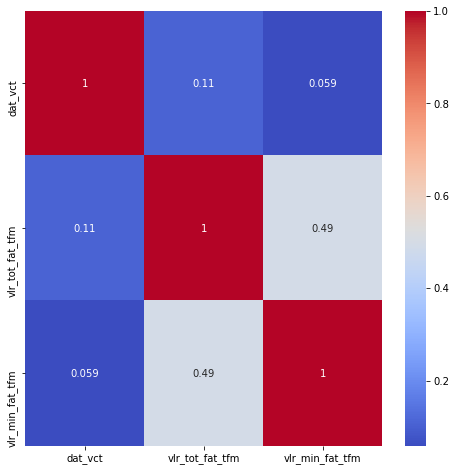

In [280]:
#Mapa de Correlação
plt.figure(figsize =(8,8))
seaborn.heatmap(df2.corr(),annot = True,cmap = 'coolwarm')

In [282]:
cartao = cartao[['doc_cli','sdo_ddr_tfm','cod_mdl']]

In [264]:
for index, row in cartao.iterrows():
    i= 0
    for index2,row2 in pessoa.iterrows():
        if row['doc_cli'] == row2['cpf']:
            cartao.loc[i,'ano'] = row2['ano_dat_nascimento']
            i+=1
            continue
        else:
            continue
